In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)


In [19]:
c = stats.norm.cdf(1)
print(d)
p =  stats.norm.ppf(0.1)
print(p)

0.8413447460685429
-1.2815515655446004


The negative sign in the ppf means that the sigma value is less than the mean.

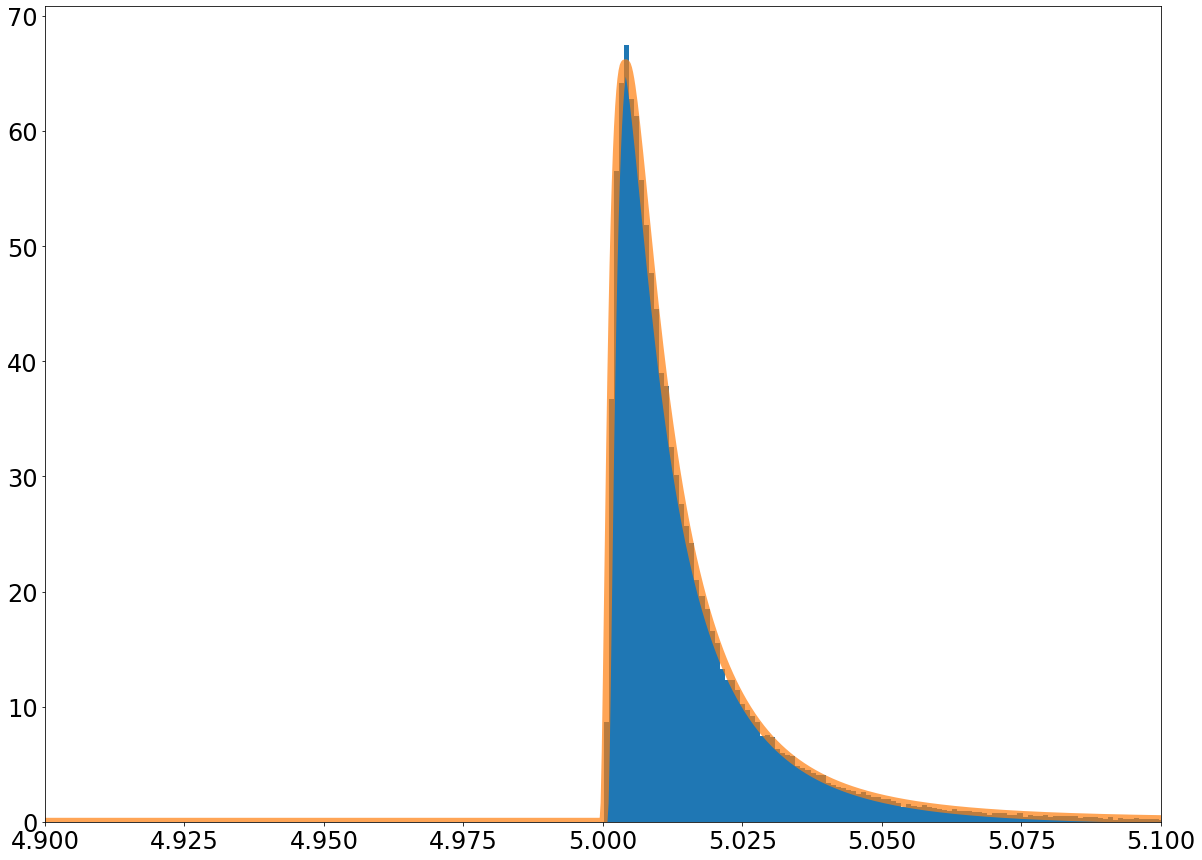

In [104]:
s = 0.954
d = stats.lognorm.rvs(s, loc = 5., scale = 0.01, size = 100000)

fig, ax = plt.subplots(1, 1)
ax.hist(d,500, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([4.90,5.10])
x = np.linspace(4.90,5.10,1000)
ax.plot(x,stats.lognorm.pdf(x, s, loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

Hypothetical Measurement: 5.05
What is the probability of my distribution making a mistake, and giving off a false positive for signal like data.

In [94]:
integral = stats.lognorm.cdf(5.05,s, loc=5, scale = 0.01)
print(integral)
sigma =  stats.norm.ppf(integral)
print(sigma)

0.9542023461896624
1.687041836933016


The sigma values always follow that of a standardized normal distributions, and don't directly apply to the lognormal distribution.

## Non-continuous distribution (Poisson)

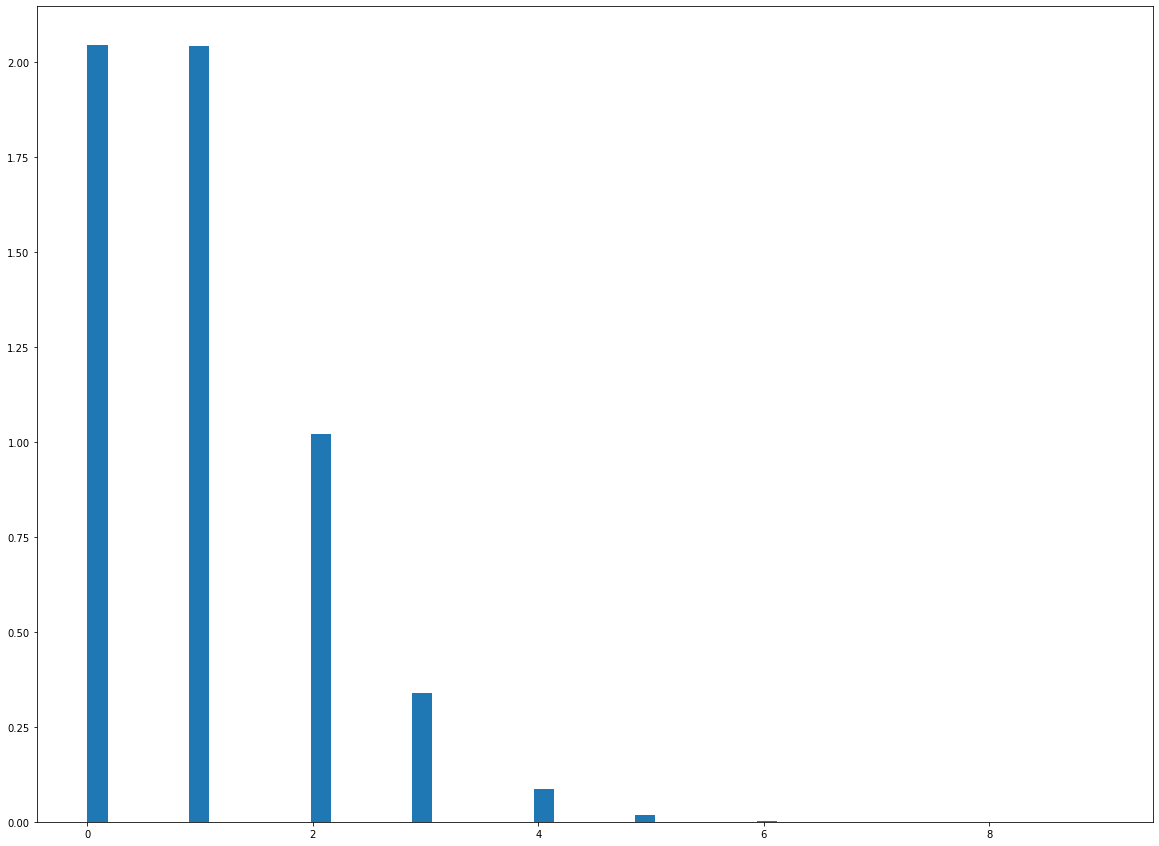

In [134]:
mu = 1

d = stats.poisson.rvs(mu, loc=0, size=1000000, random_state=None)
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.show()

The poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space. The varying parameter in this case is mu, which is the definitive shape parameter of the poisson distribution. With a mu of 1 we have a stair case shape.

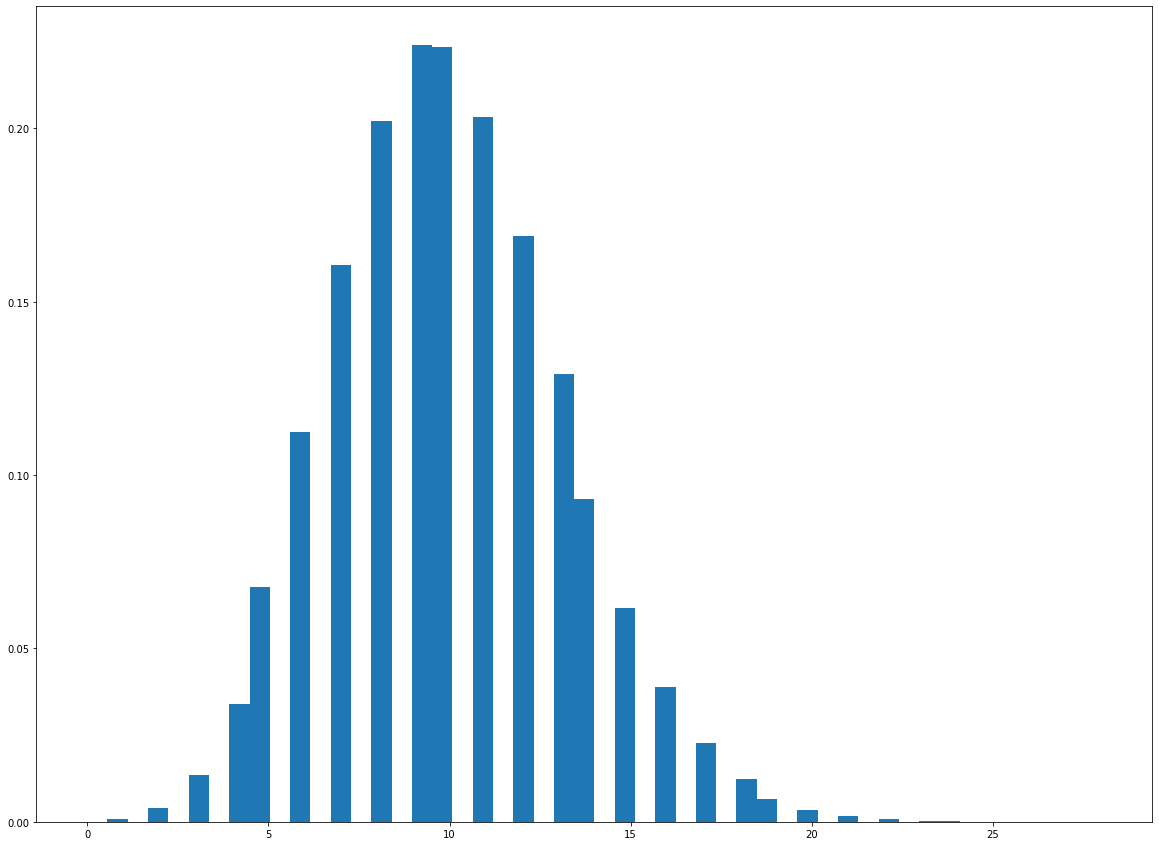

In [135]:
mu = 10

d = stats.poisson.rvs(mu, loc=0, size=1000000, random_state=None)
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.show()

A mu of 10 gives us an interval based normal like distribution.

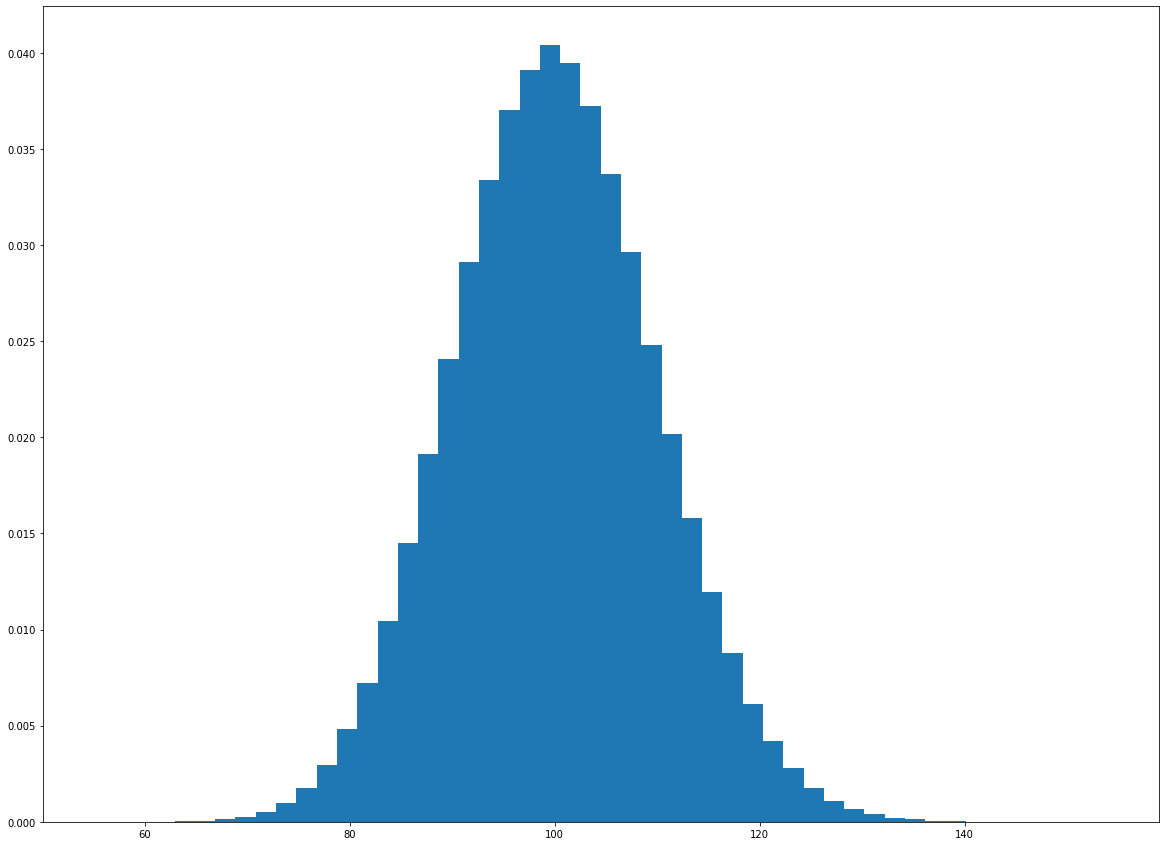

In [148]:
mu = 100

d = stats.poisson.rvs(mu, loc=0, size=1000000, random_state=None)
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.show()

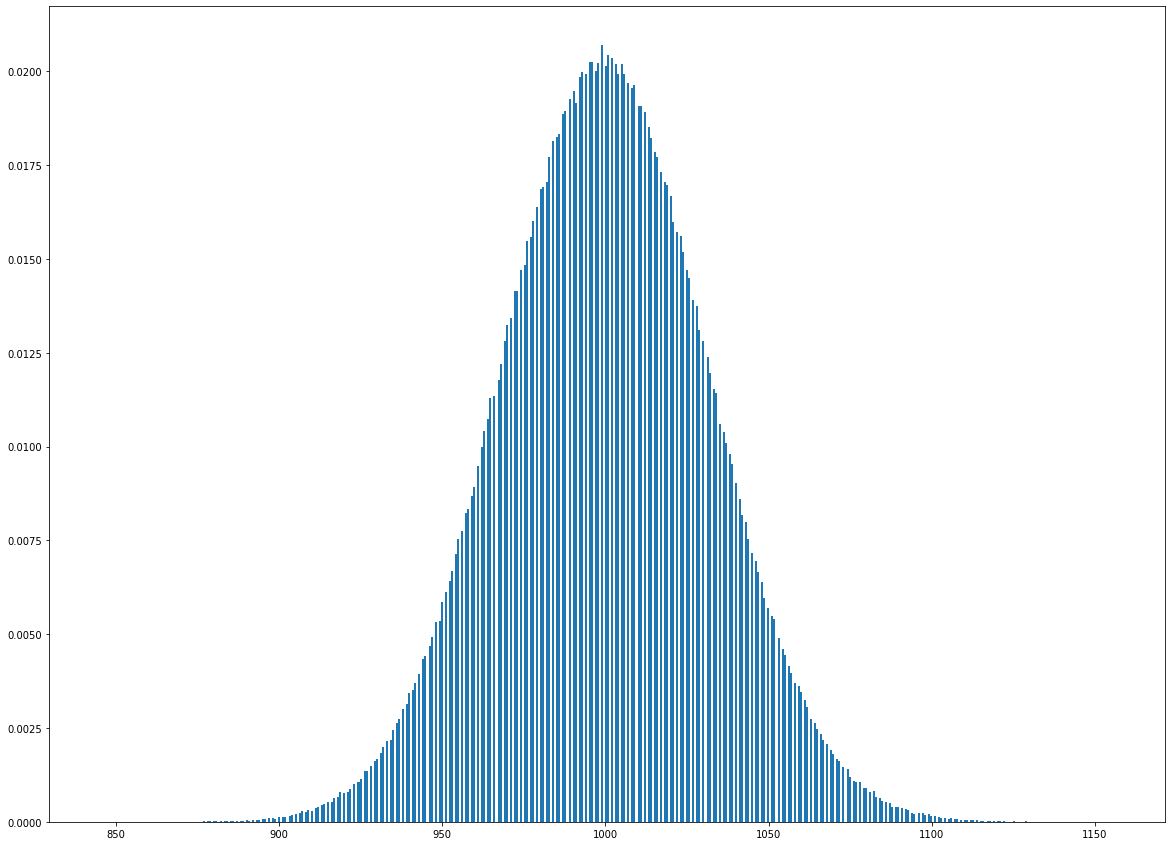

In [154]:
mu = 1000

d = stats.poisson.rvs(mu, loc=0, size=1000000, random_state=None)
fig, ax = plt.subplots(1, 1)
ax.hist(d,500, density=True)
plt.show()

Finally, at mu = 1000, we have something that pretty accurately resembles a normal distribution. It is key to note that as mu increases, the mean and standard deviation also increase, while the y-axis shrinks. 

Hypothetical Measurement: 1075.
What is the probability of my distribution making a mistake, and giving off a false positive for signal like data, at the right edge of the poisson distribution. 

In [156]:
print(mu)
integral = stats.poisson.cdf(1075,mu, loc=0)
print(integral)
sigma =  stats.norm.ppf(integral)
print(sigma)

1000
0.9909506075220879
2.3635909220808133


Since the probabilities and sigma are discrete, we can always understand any distribution under a standardized normal distribution. 
Since the parameters are not discrete, and they cause the data to vary wildly, we need to choose the correct parameters to represent the data.